# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



# Q1 Answer

Given the following probabilities:

- $p(\text{pass}) = 0.9$
- $p(\text{quick} | \text{pass}) = 0.6$
- $p(\text{quick} | \text{NOT pass}) = 0.3$

Note $p(\text{NOT pass}) = 1 - p(\text{pass}) = 0.1$.

Using the law of total probability:
\begin{align*}
p(\text{quick}) &= p(\text{quick} | \text{pass}) p(\text{pass}) + p(\text{quick} | \text{NOT pass}) p(\text{NOT pass})
\\
p(\text{quick}) &= (0.6)(0.9) + (0.3)(0.1) = 0.54 + 0.03 = 0.57
\end{align*}

Finally, applying Bayes Theorem:

$p(\text{pass} | \text{quick}) = \frac{p(\text{quick} | \text{pass}) p(\text{pass})}{p(\text{quick})} = \frac{(0.6)(0.9)}{0.57} = \frac{0.54}{0.57} \approx 0.947$

# Q2 Answer
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet}
\end{align*}

I assume we have $k$ mutually exclusive categories.
The posterior is as follows:
\begin{align*}
p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} \\
&\propto \left(\frac{n!}{x_{1}! \ldots x_{k}!}\theta_1^{x_{1}} \ldots \theta_k^{x_{k}}\right)\left(\frac{1}{B(\alpha)} \prod_{i=1}^k\theta_i^{(\alpha_i-1)}\right) \\
&= \left(\frac{n!}{x_{1}! \ldots x_{k}!}\cdot\frac{1}{B(\alpha)}\right)\left( \prod_{i=1}^k\theta_i^{(x_i + \alpha_i-1)}\right) \\
&\propto \frac{1}{B(\alpha')} \prod_{i=1}^k\theta_i^{(x_i + \alpha_i-1)}\\
&= \texttt{Dirichlet distribution with parameterization } \boldsymbol{\alpha'} = \boldsymbol{x} + \boldsymbol{\alpha}
\end{align*}

So the posterior is proportional to a Dirichlet distribution, like the prior, with a new parameterization $\boldsymbol{\alpha'} = \boldsymbol{x} + \boldsymbol{\alpha}$ and the other category parameter $k$ remaining the same.


### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_** proper; i.e. the prior integrates to 1.


# Q3 Answer

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample:

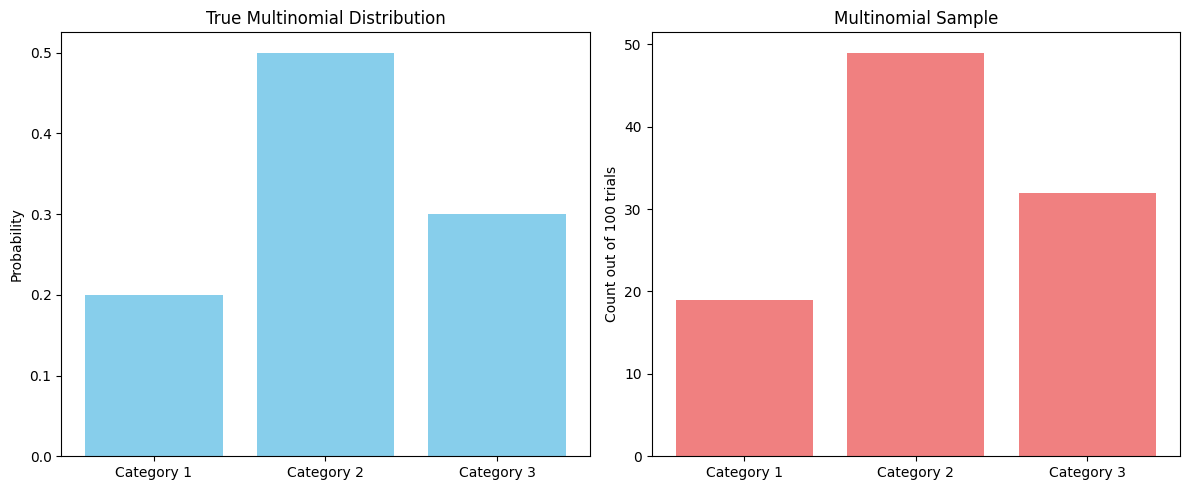

In [ ]:
# Generate a sample from a three-category multinomial distribution
n_trials = 100
true_probs = [0.2, 0.5, 0.3]
multinomial_sample = np.random.multinomial(n_trials, true_probs)

# Visualize the multinomial distribution and the multinomial sample
categories = ['Category 1', 'Category 2', 'Category 3']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(categories, true_probs, color='skyblue')
axes[0].set_title('True Multinomial Distribution')
axes[0].set_ylabel('Probability')

axes[1].bar(categories, multinomial_sample, color='lightcoral')
axes[1].set_title('Multinomial Sample')
axes[1].set_ylabel('Count out of 100 trials')

plt.tight_layout()
plt.show()

Visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot:

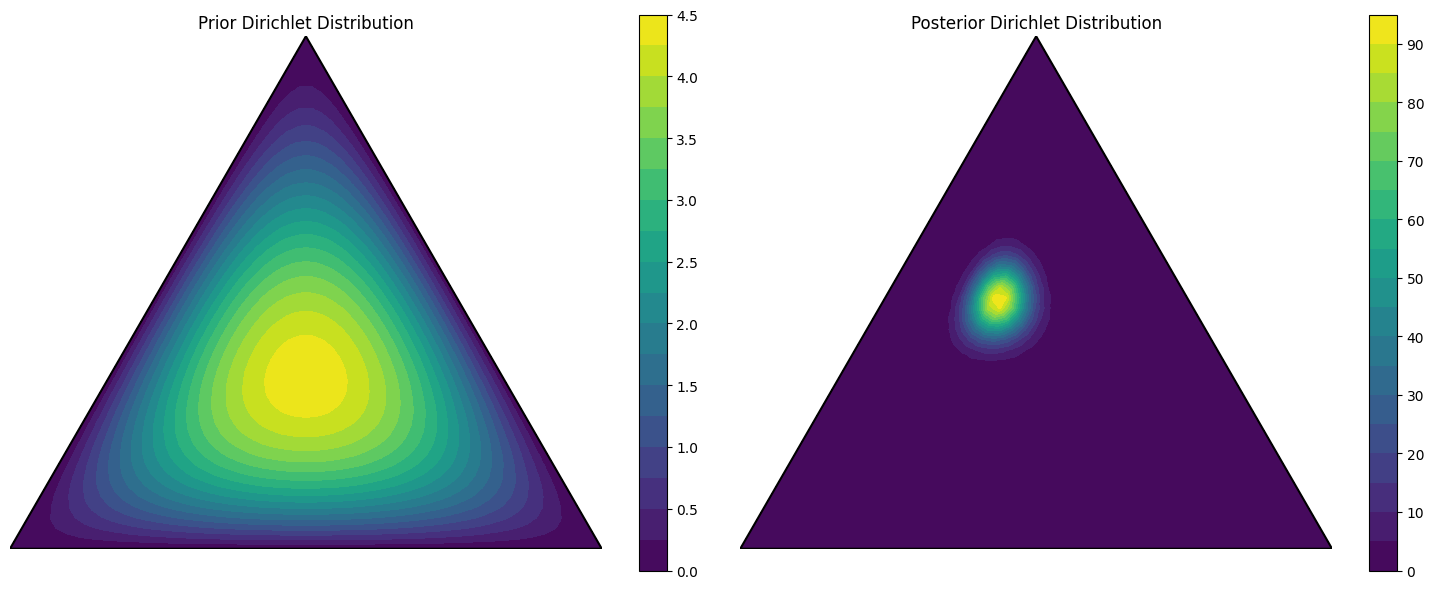

Prior parameters (alpha): [2 2 2]
Posterior parameters (alpha): [21 51 34]


In [ ]:
def create_triangle_grid(n_points=20):
    """Create a triangular grid for the simplex."""
    side_points = np.linspace(0, 1, n_points)
    x = []
    y = []
    z = []

    for i in range(n_points):
        for j in range(n_points - i):
            k = n_points - 1 - i - j
            p1 = i / (n_points - 1)
            p2 = j / (n_points - 1)
            p3 = k / (n_points - 1)
            x.append(p1)
            y.append(p2)
            z.append(p3)

    return np.array(x), np.array(y), np.array(z)

def barycentric_to_cartesian(p1, p2, p3):
    """Convert barycentric coordinates to cartesian coordinates."""
    # Heights of an equilateral triangle
    x = 0.5 * (2 * p1 + p2)
    y = np.sqrt(3)/2 * p2
    return x, y

alpha_prior = np.array([2, 2, 2])  # Symmetric prior
alpha_posterior = alpha_prior + multinomial_sample

# Create grid and compute PDF values
x, y, z = create_triangle_grid(n_points=50)
points = np.column_stack([x, y, z])
pdf_prior = stats.dirichlet.pdf(points.T, alpha_prior)
pdf_posterior = stats.dirichlet.pdf(points.T, alpha_posterior)

# Convert to cartesian coordinates for plotting
cart_x, cart_y = barycentric_to_cartesian(x, y, z)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
for ax, pdf_values, title, alphas in [
    (ax1, pdf_prior, 'Prior Dirichlet Distribution', alpha_prior),
    (ax2, pdf_posterior, 'Posterior Dirichlet Distribution', alpha_posterior)
]:
    # plot the heatmap
    tri = Triangulation(cart_x, cart_y)
    tcm = ax.tricontourf(tri, pdf_values, levels=20, cmap='viridis')
    plt.colorbar(tcm, ax=ax)

    # triangle boundary
    triangle_vertices = np.array([
        barycentric_to_cartesian(1, 0, 0),
        barycentric_to_cartesian(0, 1, 0),
        barycentric_to_cartesian(0, 0, 1),
        barycentric_to_cartesian(1, 0, 0)
    ])
    ax.plot(triangle_vertices[:, 0], triangle_vertices[:, 1], 'k-')

    ax.set_title(title)
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Prior parameters (alpha):", alpha_prior)
print("Posterior parameters (alpha):", alpha_posterior)